In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/traffic-signs/test.p
/kaggle/input/traffic-signs/15_no_vehicles.jpg
/kaggle/input/traffic-signs/train.p
/kaggle/input/traffic-signs/11_right-of-way.jpg
/kaggle/input/traffic-signs/12_priority_road.jpg
/kaggle/input/traffic-signs/signnames.csv
/kaggle/input/traffic-signs/18_general_caution.jpg
/kaggle/input/traffic-signs/9_no_passing.jpg
/kaggle/input/traffic-signs/valid.p


## 1. Project Overview:

<font color="blue">
Traffic Sign Classification is very crucial for self-driving cars.
    
In this project, I will use convolutional neural networks that can classify 43 different traffic signs.

<font color="blue">

The dataset consists of 43 different classes of images.

Classes are as listed below:

0 = Speed limit (20km/h)
    
1 = Speed limit (30km/h)
    
2 = Speed limit (50km/h)
    
3 = Speed limit (60km/h)
    
4 = Speed limit (70km/h)
    
5 = Speed limit (80km/h)
    
6 = End of speed limit (80km/h)
    
7 = Speed limit (100km/h)
    
8 = Speed limit (120km/h)
    
9 = No passing
    
10 = No passing for vehicles over 3.5 metric tons
    
11 = Right-of-way at the next intersection
    
12 = Priority road
    
13 = Yield
    
14 = Stop
    
15 = No vehicles
    
16 = Vehicles over 3.5 metric tons prohibited
    
17 = No entry
    
18 = General caution
    
19 = Dangerous curve to the left
    
20 = Dangerous curve to the right
    
21 = Double curve
    
22 = Bumpy road
    
23 = Slippery road
    
24 = Road narrows on the right
    
25 = Road work
    
26 = Traffic signals
    
27 = Pedestrians
    
28 = Children crossing
    
29 = Bicycles crossing
    
30 = Beware of ice/snow
    
31 = Wild animals crossing
    
32 = End of all speed and passing limits
    
33 = Turn right ahead
    
34 = Turn left ahead
    
35 = Ahead only
    
36 = Go straight or right
    
37 = Go straight or left
    
38 = Keep right
    
39 = Keep left
    
40 = Roundabout mandatory
    
41 = End of no passing
    
42 = End of no passing by vehicles over 3.5 metric tons

In [13]:
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
import pickle
import random
import cv2

In [3]:
with open("../input/traffic-signs/train.p", mode='rb') as training_data:
    train = pickle.load(training_data)
with open("../input/traffic-signs/valid.p", mode='rb') as validation_data:
    valid = pickle.load(validation_data)
with open("../input/traffic-signs/test.p", mode='rb') as testing_data:
    test = pickle.load(testing_data)

In [4]:
X_train, y_train = train["features"], train["labels"]
X_train.shape
#we have 34799 images with 32 x 32 size in 3 color channels.

(34799, 32, 32, 3)

In [5]:
y_train.shape

(34799,)

In [6]:
X_test,y_test = test["features"], test["labels"]
print(X_test.shape)
print(y_test.shape)

(12630, 32, 32, 3)
(12630,)


In [7]:
X_valid, y_valid = valid["features"], valid["labels"]
print(X_valid.shape)
print(y_valid.shape)

(4410, 32, 32, 3)
(4410,)


## 2. Data Visualization

9

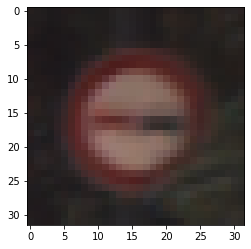

In [8]:
i = random.randint(0,len(X_train))
plt.imshow(X_train[i])
y_train[i]

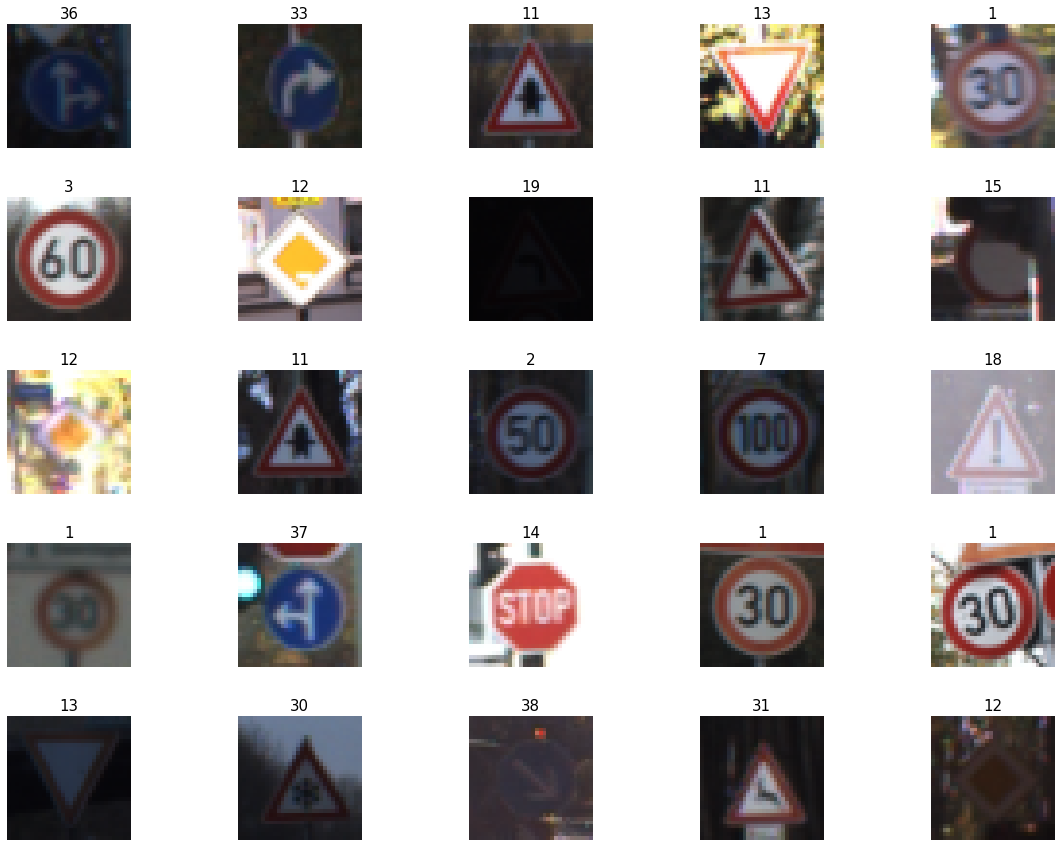

In [9]:
#Lets visualize multiple images:
fig,axes = plt.subplots(5,5,figsize=(20,15))
axes = axes.ravel() # flatten 5x5 matrix into 25 array
for i in range(0,25):
    index = random.randint(1,len(X_train))
    axes[i].imshow(X_train[index])
    axes[i].set_title(y_train[index], fontsize = 15)
    axes[i].axis("off")
plt.subplots_adjust(hspace=0.4)


## 3. Data Preparation and Analysis:

In [11]:
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train,y_train)
# I do now want that neural networks a meaning from the sequence of the data.

In [15]:
# Lets normalize the images as follows:
X_train = X_train/255
X_test = X_test/255
X_valid = X_valid/255

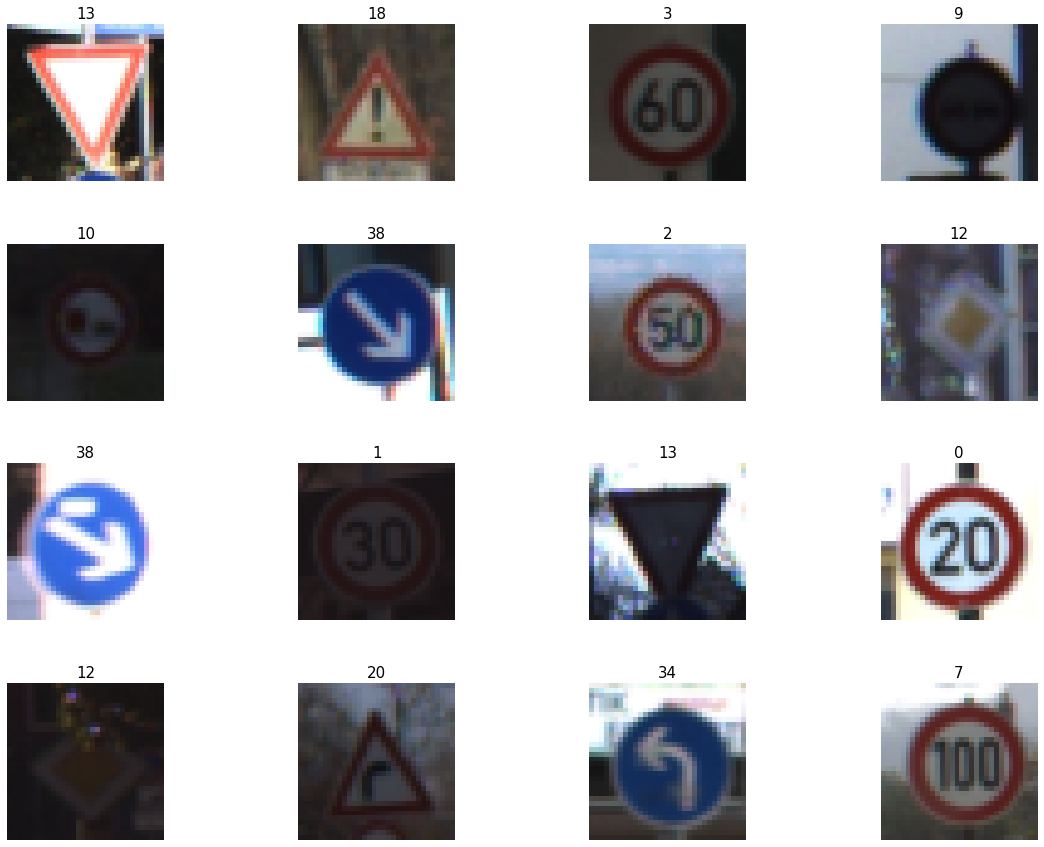

In [17]:
#Lets visualize the images after normalization:
fig,axes = plt.subplots(4,4,figsize=(20,15))
axes = axes.ravel() # flatten 5x5 matrix into 25 array
for i in range(0,16):
    index = random.randint(1,len(X_train))
    axes[i].imshow(X_train[index])
    axes[i].set_title(y_train[index], fontsize = 15)
    axes[i].axis("off")
plt.subplots_adjust(hspace=0.4)

## 4. Training Neural Networks:

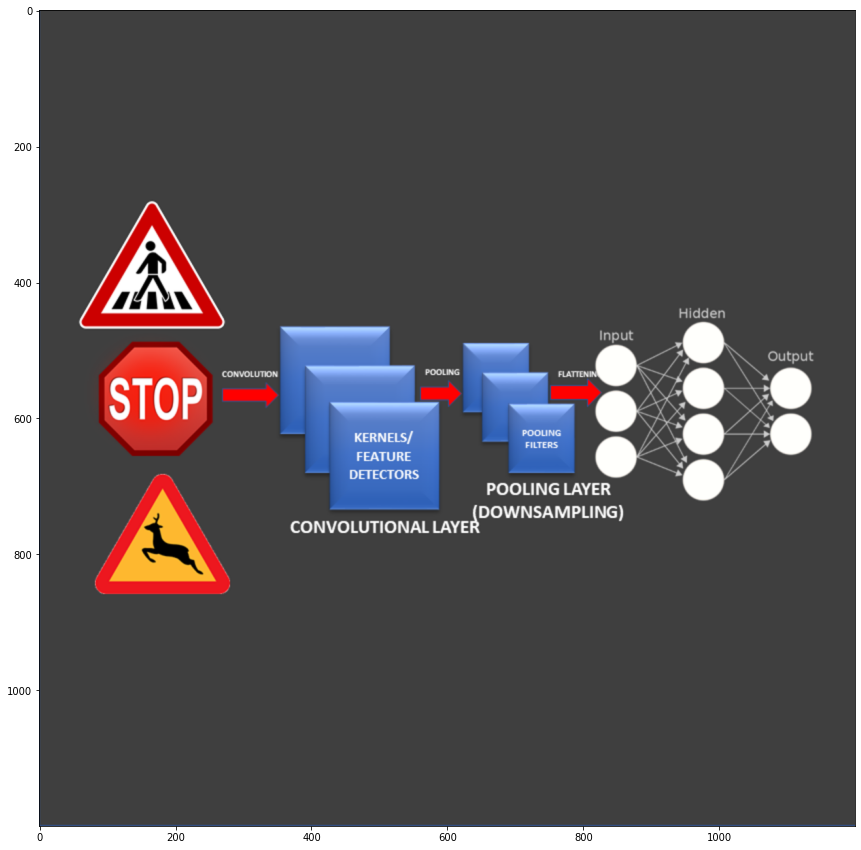

In [19]:
plt.figure(figsize=(20,15))
plt.imshow(plt.imread("../input/convolution/conv.png"))
#How neural networks work:

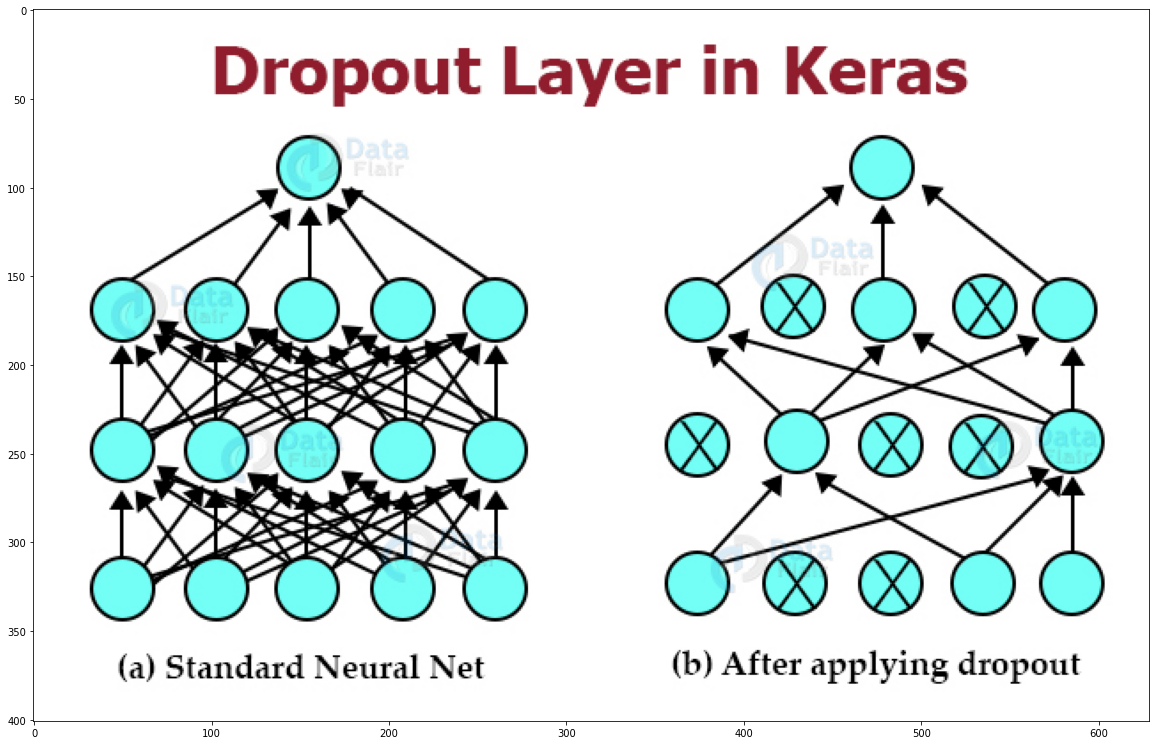

In [20]:
#> we will also add dropout layer in order to avoid from overfitting
plt.figure(figsize=(20,15))
plt.imshow(plt.imread("../input/dropout/dropout.jpg"))
#Dropout layer drops some of the perceptrons. How dropout layer work:

In [45]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, AveragePooling2D, MaxPool2D, Flatten, Dense, Dropout
cnn = Sequential()
cnn.add(Conv2D(filters=16,  kernel_size=3, activation="relu",input_shape=(32,32,3)))
cnn.add(MaxPool2D(pool_size=2, strides=2))
cnn.add(Dropout(0.2))
cnn.add(Conv2D(filters=64, activation="relu",kernel_size=3))
cnn.add(MaxPool2D(pool_size=2, strides=2))
cnn.add(Flatten())
cnn.add(Dense(units=512,activation="relu"))
#cnn.add(Dense(units=80,activation="relu"))
cnn.add(Dropout(0.2))
cnn.add(Dense(units=43,activation="softmax"))
cnn.summary()
        


Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_26 (Conv2D)           (None, 30, 30, 16)        448       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 15, 15, 16)        0         
_________________________________________________________________
dropout_14 (Dropout)         (None, 15, 15, 16)        0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 13, 13, 64)        9280      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 2304)              0         
_________________________________________________________________
dense_18 (Dense)             (None, 512)             

In [46]:
cnn.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [47]:
history = cnn.fit(X_train,y_train, validation_data=(X_valid,y_valid),epochs=10, batch_size=500)

Epoch 1/10
70/70 [==============================] - 18s 250ms/step - loss: 3.0538 - accuracy: 0.2166 - val_loss: 1.6402 - val_accuracy: 0.5231
Epoch 2/10
70/70 [==============================] - 17s 250ms/step - loss: 1.2356 - accuracy: 0.6310 - val_loss: 0.9004 - val_accuracy: 0.7544
Epoch 3/10
70/70 [==============================] - 17s 245ms/step - loss: 0.6248 - accuracy: 0.8155 - val_loss: 0.6464 - val_accuracy: 0.8261
Epoch 4/10
70/70 [==============================] - 17s 248ms/step - loss: 0.3760 - accuracy: 0.8933 - val_loss: 0.4728 - val_accuracy: 0.8626
Epoch 5/10
70/70 [==============================] - 17s 245ms/step - loss: 0.2639 - accuracy: 0.9269 - val_loss: 0.4441 - val_accuracy: 0.8844
Epoch 6/10
70/70 [==============================] - 17s 247ms/step - loss: 0.2011 - accuracy: 0.9472 - val_loss: 0.4206 - val_accuracy: 0.8882
Epoch 7/10
70/70 [==============================] - 17s 249ms/step - loss: 0.1551 - accuracy: 0.9608 - val_loss: 0.3975 - val_accuracy: 0.9034

In [44]:
cnn.evaluate(X_test,y_test)

395/395 [==============================] - 3s 7ms/step - loss: 0.4211 - accuracy: 0.9082


[0.42112699151039124, 0.9082343578338623]

## 5. Model Evaluation

In [48]:
from sklearn.metrics import confusion_matrix, classification_report

In [49]:
predictions = cnn.predict_classes(X_test)
print(classification_report(y_test,predictions))

/opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


              precision    recall  f1-score   support

           0       1.00      0.32      0.48        60
           1       0.86      0.96      0.90       720
           2       0.93      0.95      0.94       750
           3       0.87      0.94      0.90       450
           4       0.98      0.90      0.93       660
           5       0.84      0.89      0.86       630
           6       0.95      0.83      0.89       150
           7       0.94      0.77      0.85       450
           8       0.82      0.92      0.87       450
           9       0.95      0.95      0.95       480
          10       0.96      0.97      0.97       660
          11       0.82      0.91      0.86       420
          12       1.00      0.96      0.98       690
          13       1.00      0.98      0.99       720
          14       1.00      1.00      1.00       270
          15       0.94      0.99      0.96       210
          16       0.96      0.99      0.98       150
          17       1.00    

<AxesSubplot:>

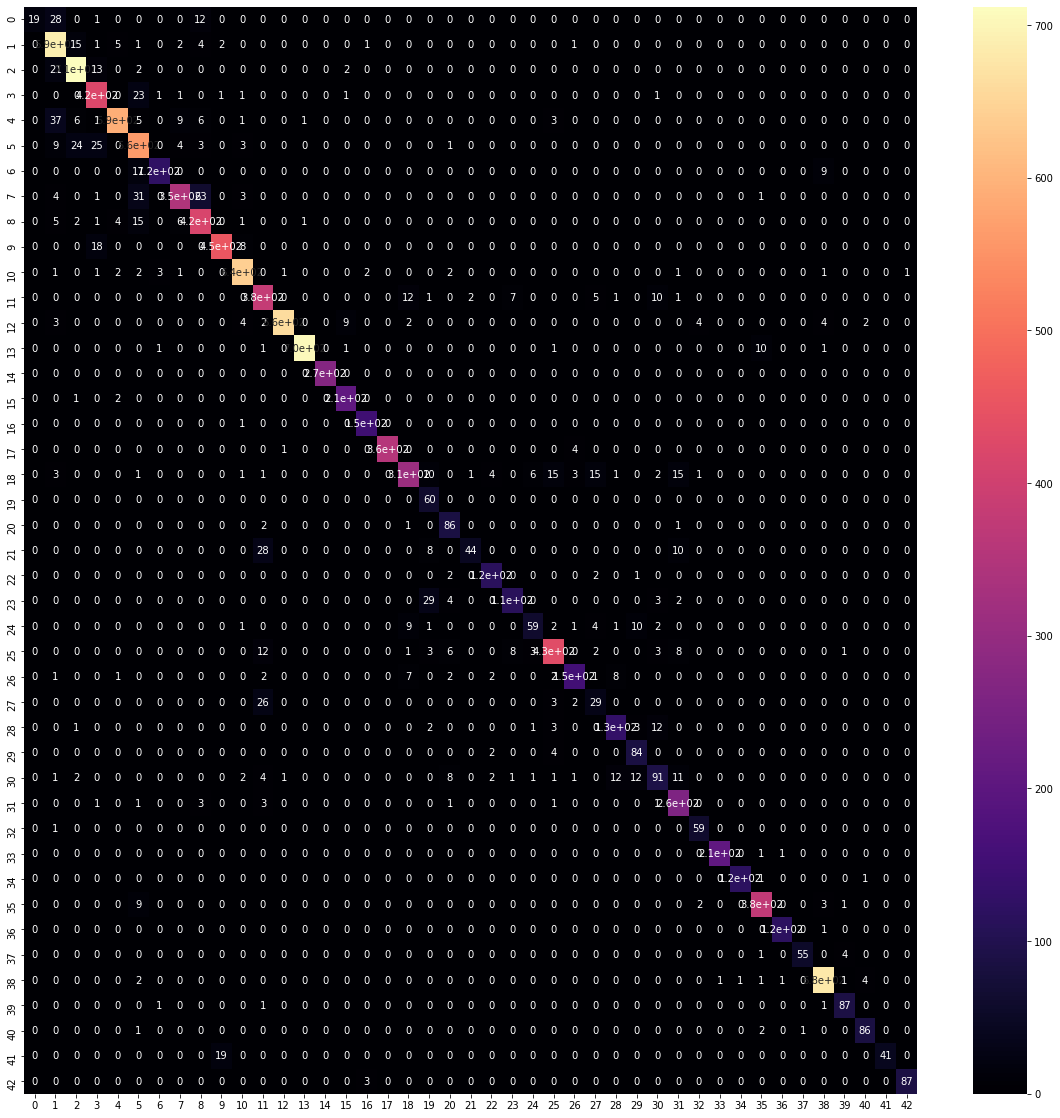

In [51]:
cm = confusion_matrix(y_test,predictions)
plt.figure(figsize=(20,20))
sns.heatmap(cm,annot=True, cmap="magma")

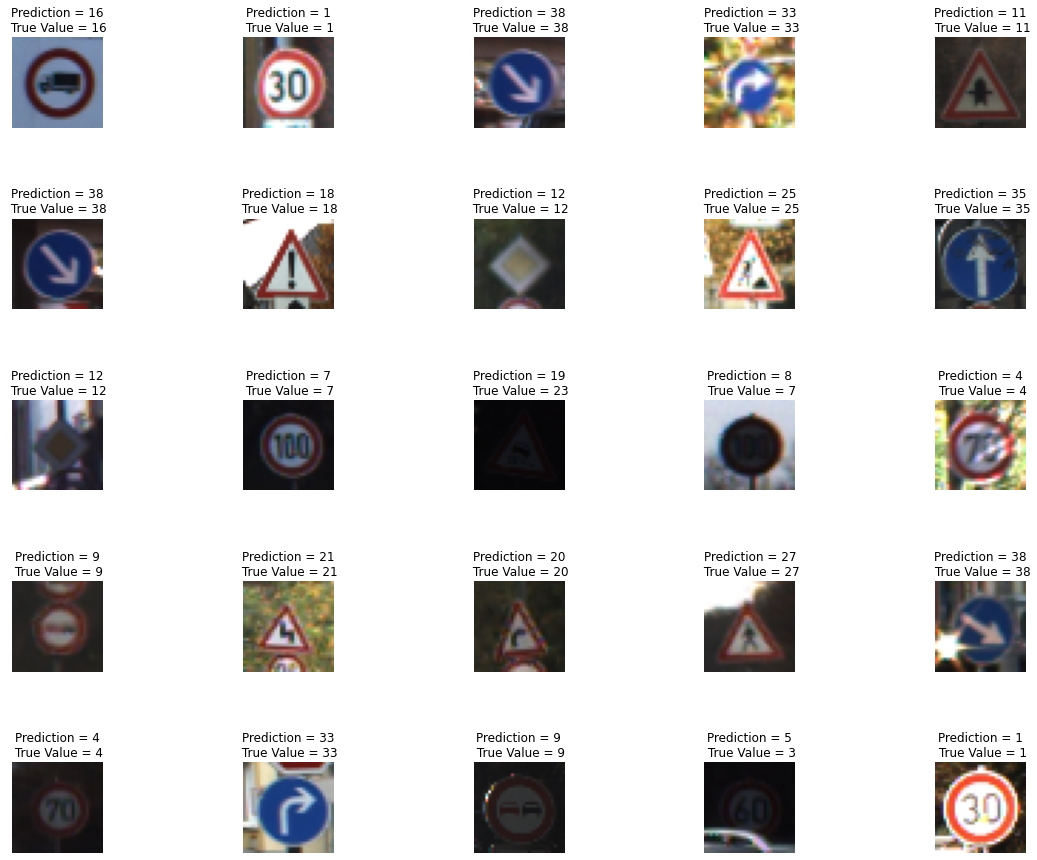

In [52]:
#Lets compare our predictions with the true values in visualization:
#Lets visualize multiple images:
fig,axes = plt.subplots(5,5,figsize=(20,15))
axes = axes.ravel() # flatten 5x5 matrix into 25 array
for i in range(0,25):
    axes[i].imshow(X_test[i])
    axes[i].set_title(f"Prediction = {predictions[i]}\n True Value = {y_test[i]}")
    axes[i].axis("off")
plt.subplots_adjust(hspace=1)